# Contents

<a href= "s1">  Introduction</a>

<a href= "s2">  Data </a>

<a href= "s3">  Data Preprocessing</a>

<a href= "s4">  Resampling Data</a>

<a href= "s5">  Define X and y   </a>

<a href= "s6">Normalize the data </a>

<a href= "s7"> Splitting our Data Set into Training Data and Test Data </a>

<a href= "s7">Methodology</a>

<a href= "s8"> KNN </a>

<a href= "s9"> Decision Tree</a>

<a href= "s10"> Logistic Regression </a>

<a href= "s11"> Evaluation </a>

<a href= "s12">Conclusion </a>


# Introduction

 Every year car accidents cause hundreds of thousands of deaths worldwide. According to a research conducted by the World Health Organization (WHO) there were 1.35 million road tra c deaths globally in 2016, with millions more sustaining serious injuries and living with long-term adverse health consequences. Globally, road tra c crashes are a leading cause of death among young people, and the main cause of death among those aged 15{29 years. Road tra c injuries are currently estimated to be the eighth leading cause of death across all age groups globally, and are predicted to become the seventh leading cause of death by 2030.
 
For the final capstone project in the IBM certificate course, we want to analyze the accident “severity” in terms of human fatality, traffic delay, property damage, or any other type of accident bad impact. The data was collected by Seattle SPOT Traffic Management Division and provided by Coursera via a link. This dataset is updated weekly and is from 2004 to present. It contains information such as severity code, address type, location, collision type, weather, road condition, speeding, among others.

The target audiences of this study are those people who really care about the traffic records, especially in the transportation department. Also, we want to figure out the reason for collisions and help to reduce accidents in the future.


# Data

The data was collected by Seattle SPOT Traffic Management Division and provided by Coursera via a link. There are 194,673 observations and 38 variables in this data set. Since we would like to identify the factors that cause the accident and the level of severity, we will use SEVERITYCODE as our dependent variable Y (Target Variable) , and try different combinations of independent variables X to get the result. Since the observations are quite large, we may need to filter out the missing value and delete the unrelated columns first. Then we can select the factor which may have more impact on the accidents such as weather, road condition, and light condition.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import string

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df= pd.read_csv("Data-Collisions.csv")

C:\Users\Keeru\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


 Other important variables include in the given dataset:

• ADDRTYPE: Collision address type: Alley, Block, Intersection

• LOCATION: Description of the general location of the collision

• PERSONCOUNT: The total number of people involved in the collision helps identify severity involved

• PEDCOUNT: The number of pedestrians involved in the collision helps identify severity involved

• PEDCYLCOUNT: The number of bicycles involved in the collision helps identify severity involved

• VEHCOUNT: The number of vehicles involved in the collision identify severity involved

• JUNCTIONTYPE: Category of junction at which collision took place helps identify where most collisions occur • WEATHER: A description of the weather conditions during the time of the collision

• ROADCOND: The condition of the road during the collision

• LIGHTCOND: The light conditions during the collision

• SPEEDING: Whether or not speeding was a factor in the collision (Y/N)

• SEGLANEKEY: A key for the lane segment in which the collision occurred

• CROSSWALKKEY: A key for the crosswalk at which the collision occurred

• HITPARKEDCAR: Whether or not the collision involved hitting a parked car

Furthermore, because of the existence of null values in some records, the data needs to be preprocessed before any further processing.

In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Other important variables include in the given dataset:

• ADDRTYPE: Collision address type: Alley, Block, Intersection

• LOCATION: Description of the general location of the collision

• PERSONCOUNT: The total number of people involved in the collision helps identify severity involved

• PEDCOUNT: The number of pedestrians involved in the collision helps identify severity  involved

• PEDCYLCOUNT: The number of bicycles involved in the collision helps identify severity involved

• VEHCOUNT: The number of vehicles involved in the collision identify severity involved

• JUNCTIONTYPE: Category of junction at which collision took place helps identify where   most collisions occur

• WEATHER: A description of the weather conditions during the time of the collision

• ROADCOND: The condition of the road during the collision

• LIGHTCOND: The light conditions during the collision

• SPEEDING: Whether or not speeding was a factor in the collision (Y/N)

• SEGLANEKEY: A key for the lane segment in which the collision occurred

• CROSSWALKKEY: A key for the crosswalk at which the collision occurred

• HITPARKEDCAR: Whether or not the collision involved hitting a parked car


In [41]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [42]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


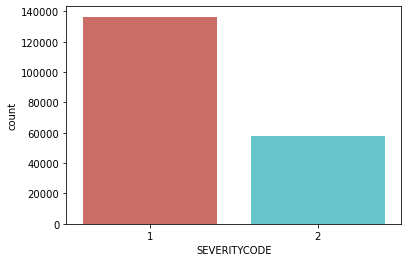

In [8]:
#no. of no injury collisions and no. of injuriy collisions.
sns.countplot(x='SEVERITYCODE', data=df, palette='hls')
plt.show()

SEVERITYCODE, which assigns a crash a value of 1, which means no injury, and 2, indicating injury

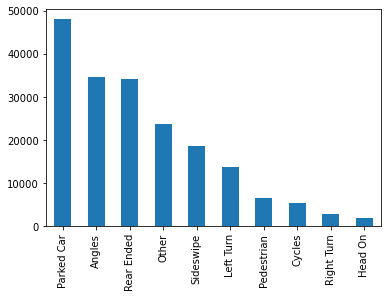

In [21]:
df['COLLISIONTYPE'].value_counts().plot(kind ='bar')

In [31]:
df['COLLISIONTYPE'].value_counts().to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


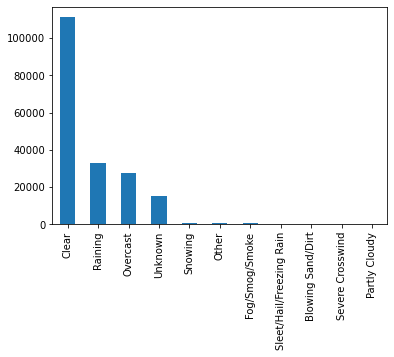

In [30]:
df['WEATHER'].value_counts().plot(kind ='bar')

In [29]:
df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


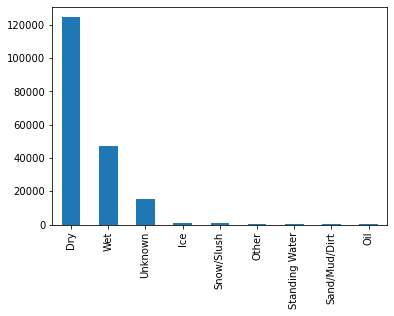

In [35]:
df['ROADCOND'].value_counts().plot(kind ='bar')


In [36]:
df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


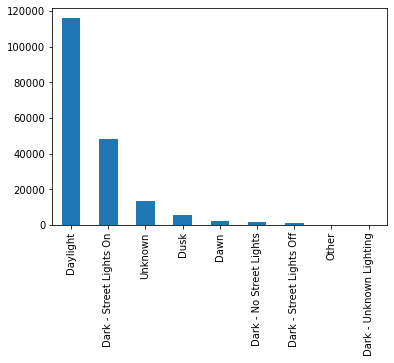

In [40]:
df['LIGHTCOND'].value_counts().plot(kind ='bar')

In [39]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


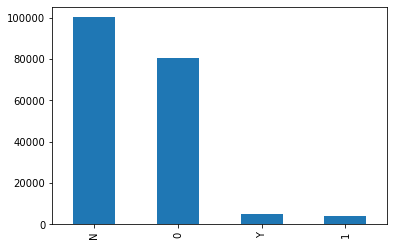

In [37]:
df['UNDERINFL'].value_counts().plot(kind ='bar')

In [32]:
df['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


In [48]:
df['LOCATION'].value_counts().to_frame()

,LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
6TH AVE AND JAMES ST,252
...,...
27TH AVE W BETWEEN W RAYE ST AND W ARMOUR ST,1
NW 80TH ST BETWEEN 27TH AVE NW AND EARL AVE NW,1
23RD AVE NW BETWEEN NW 67TH ST AND NW 70TH ST,1
S RIVER ST BETWEEN 5TH AVE S AND 5TH PL S,1


I visualized the data in the form of bar graphs from original dataset.
Most crashes happened in clear, dry, and bright conditions. Most days are clear, dry, and bright, so it’s no surprise that most car crashes occur under these conditions. I also found out that crashes with a distracted driver or an impaired driver are statistically more likely to result in injury, which is also not a surprise.

I thought that maybe weather, road, and light condition may cause more accidents.However, we do figure out that the accidents are highly related to some specific locations. Thus, the traffic management division could try to improve the safety instructions or some other factors that could reduce the accidents.


# Data Preprocessing

The dataset in the original form is not ready for data analysis. In order to prepare the data, first, we need to drop the non-relevant columns. In addition, most of the features are of object data types that need to be converted into numerical data types.

After analyzing the data set, I have decided to focus on only four features, severity, weather conditions, road conditions, and light conditions, among others.

In it's original form, this data is not fit for analysis. For one, there are many columns that we will not use for this model. Also, most of the features are of type object, when they should be numerical type.

We must use label encoding to covert the features to our desired data type.


In [4]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)


In [5]:
#Making new dataframe with only variables and unique keys
selected_columns=df[["WEATHER","ROADCOND","LIGHTCOND","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()


    #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

    #Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

    #Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)



# Resampling Data

To get a good understanding of the dataset, I have checked different values in the features. The results show, the target feature SEVERITYCODE is imbalance, so we use a simple statistical technique to balance it.

In [6]:
df_maj = feature_df[feature_df.SEVERITYCODE==1]
df_min = feature_df[feature_df.SEVERITYCODE==2]

sample_df = resample(df_maj, replace = False, n_samples = 57052, random_state = 123)
balanced_df = pd.concat([sample_df,df_min ])

balanced_df.SEVERITYCODE.value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

# Define X and y

In [7]:
X = balanced_df[["ROADCOND","WEATHER","LIGHTCOND"]].values
y = balanced_df.SEVERITYCODE

# Normalize the data

In [8]:
from sklearn import preprocessing

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X)

# Splitting our Data Set into Training Data and Test Data

We will use 30% of our data for testing and 70% for training.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(79872, 3) (34232, 3) (79872,) (34232,)


# Methodology

After balancing SEVERITYCODE feature, and standardizing the input feature, the data has been ready for building machine learning models.
I have employed three machine learning models:
    


K-Nearest Neighbor (KNN)

KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

Decision Tree

A decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

Logistic Regression

Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

# KNN

In [18]:

from sklearn.neighbors import KNeighborsClassifier as knn  

In [30]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 50, 2)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [31]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))


k = 1 has a Score = 0.5057840616966581 
k = 2 has a Score = 0.5048200514138818 
k = 3 has a Score = 0.5023954194905351 
k = 4 has a Score = 0.5018988081327413 
k = 5 has a Score = 0.5093771909324608 
k = 6 has a Score = 0.507361533068474 
k = 7 has a Score = 0.5077120822622108 
k = 8 has a Score = 0.510107501752746 
k = 9 has a Score = 0.5096985276933863 
k = 10 has a Score = 0.5040313157279738 
k = 11 has a Score = 0.5113636363636364 
k = 12 has a Score = 0.5136129936901145 
k = 13 has a Score = 0.5141680299135312 
k = 14 has a Score = 0.514226454779154 
k = 15 has a Score = 0.5141096050479084 
k = 16 has a Score = 0.5049369011451273 
k = 17 has a Score = 0.5049661135779387 
k = 18 has a Score = 0.5119478850198644 
k = 19 has a Score = 0.5049661135779387 
k = 20 has a Score = 0.5049661135779387 
k = 21 has a Score = 0.5049661135779387 
k = 22 has a Score = 0.5049661135779387 
k = 23 has a Score = 0.5049661135779387 
k = 24 has a Score = 0.5049661135779387 
k = 25 has a Score = 0.50496

Text(0, 0.5, 'Testing Accuracy Values')

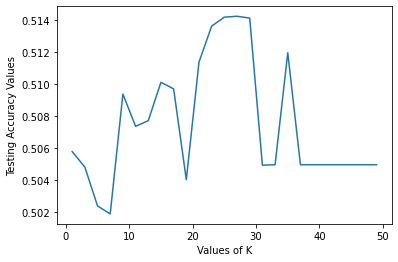

In [32]:
# Relation between k's and their respective accuracies

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [ ]:
From we find k=14 we get max score of 0.514226454779154 

In [33]:
k = 14

In [36]:
#Train Model & predict
knn_model  = knn(n_neighbors = 14).fit(X_train,y_train)
knn_yhat = knn_model.predict(X_test)
knn_yhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [70]:
# Jaccard
j1=jaccard_score(y_test, knn_yhat)
j1

0.4503557673477381

In [71]:
from sklearn.metrics import f1_score

f1=f1_score(y_test, knn_yhat, average ='macro')
f1

0.4600894929150905

In [75]:
print(classification_report(y_test,knn_yhat))

              precision    recall  f1-score   support

           1       0.51      0.80      0.62     17214
           2       0.51      0.21      0.30     17018

    accuracy                           0.51     34232
   macro avg       0.51      0.51      0.46     34232
weighted avg       0.51      0.51      0.46     34232



# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier 


In [53]:
# Main Model

dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [54]:
dt_y_pred = dt.predict(X_test)

In [72]:
j2=jaccard_score(y_test, dt_y_pred)
j2

0.2657691458839108

In [73]:
f2=f1_score(y_test, dt_y_pred, average ='macro')
f2

0.500933648294112

In [74]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           1       0.53      0.35      0.42     17214
           2       0.51      0.68      0.58     17018

    accuracy                           0.51     34232
   macro avg       0.52      0.52      0.50     34232
weighted avg       0.52      0.51      0.50     34232



# Logistic Regression

In [65]:
#Libraries

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss
LR=LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)

In [62]:
LR_y_pred = LR.predict(X_test)

In [63]:
LR_y_prob = LR.predict_proba(X_test)

In [66]:
log_loss(y_test, LR_y_prob)

0.692454836719203

In [76]:
j3=jaccard_score(y_test, LR_y_pred)
j3

0.27325174825174825

In [77]:
f3=f1_score(y_test,LR_y_pred , average ='macro')
f3

0.5032293174917176

In [78]:
print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

           1       0.52      0.36      0.43     17214
           2       0.51      0.67      0.58     17018

    accuracy                           0.51     34232
   macro avg       0.52      0.52      0.50     34232
weighted avg       0.52      0.51      0.50     34232



# Evaluation

In [79]:
jss_list = [j1, j2, j3]
jss_list

f1_list = [f1, f2, f3]
f1_list

[0.4600894929150905, 0.500933648294112, 0.5032293174917176]

In [80]:
columns = ['KNN', 'Decision Tree', 'Logistic Regression']
index = ['Jaccard', 'F1-score']

In [82]:
accuracy_df = pd.DataFrame([jss_list, f1_list], index = index, columns = columns)

In [83]:
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score
KNN,0.450356,0.460089
Decision Tree,0.265769,0.500934
Logistic Regression,0.273252,0.503229


In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 58188 values each.

Once we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. The logistic regression, KNN, and SVM models have similar accuracy that we already seen in classification report. Although the first two are ideal for this project, logistic regression made most sense because of its binary nature.

Evaluation metrics used to test the accuracy of our models were jaccard score, f-1 score. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

# Conclusion

In this study, I analyzed the relationship between severity of an accident and some characteristics which describe the situation that involved the accident.I built and compared 3 different classification models to predict whether an accident would have a high or low severity. These models can have multiple application in real life.

Based on the dataset provided for this capstone from weather, road, and light conditions pointing to certain classes, we can conclude that particular conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).

By identifying the features that favor the most the gravity of an accident, these could be tackled by improving road conditions or increasing the awareness of the population.Furthermore, there are some places which has more accidents during the dark time. For those places, adding lights might be a good solution to reduce the collisions. Also, when more cars involved in the accident, it seems that the level of severity will increase. They may need to be responded immediately to save more life.